In [1]:
import json
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from adjustText import adjust_text

plt.rcParams['font.family'] = 'Arial'

In [2]:
def is_subj_precede(lang_id):
    svo_order = lang_id[:2]
    if svo_order == "00": # SOV
        return 1
    elif svo_order == "01": # SVO
        return 1
    elif svo_order == "10": # OVS
        return 0
    elif svo_order == "11": # VOS
        return 0   

def rel_pos_obj(lang_id):
    svo_order = lang_id[:2]
    if svo_order == "00": # SOV
        return 1
    elif svo_order == "01": # SVO
        return 2
    elif svo_order == "10": # OVS
        return 0
    elif svo_order == "11": # VOS
        return 1
    
def rel_pos_verb(lang_id):
    svo_order = lang_id[:2]
    if svo_order == "00": # SOV
        return 2
    elif svo_order == "01": # SVO
        return 1
    elif svo_order == "10": # OVS
        return 1
    elif svo_order == "11": # VOS
        return 0

def rel_sbj_obj_dist(lang_id):
    svo_order = lang_id[:2]
    if svo_order == "00": # SOV
        return 1
    elif svo_order == "01": # SVO
        return 2
    elif svo_order == "10": # OVS
        return -2
    elif svo_order == "11": # VOS
        return -1

lang2gold = json.load(open("../work/lang2count.json"))
lang2gold = {lang.replace("2", "X"): score for lang, score in lang2gold.items()}
lang2gold = {k: v for k, v in sorted(lang2gold.items(), key=lambda x: x[0])}

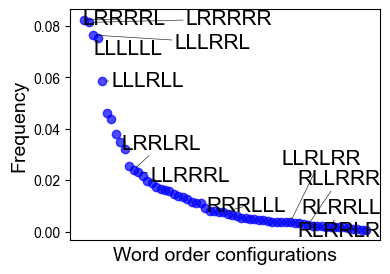

In [3]:
plt.figure(figsize=(4, 3))
# plt.figure(figsize=(5, 2))
y = list(lang2gold.values())

lang2gold = {k: v for k, v in sorted(lang2gold.items(), key=lambda x: x[1], reverse=True)}
lang_ids = [l.replace("X", "").replace("0", "L").replace("1", "R") for l in lang2gold.keys()]
freq = lang2gold.values()
noise = np.random.normal(0,0.01, len(freq))
expected_ppl = [max(f+n, 0) for f,n in zip(freq, noise)]
plt.scatter(range(len(freq)), freq, label="normalized frequency in the world", marker="o", alpha=0.7, color="blue")
plt.xlabel('Word order configurations', fontsize=14)
plt.ylabel("Frequency", fontsize=14)

texts = []
for x, y, s in zip(range(len(freq)), freq, lang_ids):
    if x in [0, 1, 2, 3, 4, 11, 12, 31, 46, 50, 55, 61]:
        texts.append(plt.text(x, y, s, fontsize=15))
adjust_text(texts, min_arrow_len=0, time_lim=1, arrowprops=dict(arrowstyle="-", lw=0.5, alpha=0.8))


plt.xticks([])
plt.savefig("../figures/fig2.pdf", bbox_inches="tight")

plt.ioff()
plt.show()

In [10]:
model2architecture = {
    "Transformer": "Transformer",
    "LSTM": "LSTM",
    "RNN": "SRN",
    "3gram": "3-gram",
    "4gram": "4-gram",
    "5gram": "5-gram",
    "Transformer-action_td": "Transformer",
    "Transformer-action_bu": "Transformer",
    "Transformer-action_lc-as": "Transformer",
    "LSTM-action_td":  "LSTM",
    "LSTM-action_bu":  "LSTM",
    "LSTM-action_lc-as": "LSTM",
    "RNN-action_td": "SRN",
    "RNN-action_bu": "SRN",
    "RNN-action_lc-as": "SRN",
    "5gram_actions_td": "5-gram",
    "4gram_actions_td": "4-gram",
    "3gram_actions_td": "3-gram",
    "bu_actions_5gram": "5-gram",
    "bu_actions_4gram": "4-gram",
    "bu_actions_3gram": "3-gram",
    "5gram_actions_lc-as": "5-gram",
    "4gram_actions_lc-as": "4-gram",
    "3gram_actions_lc-as": "3-gram",
    "RNNG_top_down": "RNNG",
    "SRNNG_top_down": "SRNNG",
    "RNNG_in_order": "RNNG",
    "SRNNG_in_order": "SRNNG",
    "llama2-7b": "LLaMA 2",
    "td": "Stack",
    "lc-as": "Stack",
}

model2syntax = {
    "Transformer": False,
    "LSTM": False,
    "RNN":  False,
    "3gram": False,
    "4gram": False,
    "5gram": False,
    "Transformer-action_td": True,
    "Transformer-action_bu": True,
    "Transformer-action_lc-as":  True,
    "LSTM-action_td": True,
    "LSTM-action_bu": True,
    "LSTM-action_lc-as": True,
    "RNN-action_td": True,
    "RNN-action_bu": True,
    "RNN-action_lc-as": True,
    "5gram_actions_td": True,
    "4gram_actions_td": True,
    "3gram_actions_td": True,
    "bu_actions_5gram": True,
    "bu_actions_4gram": True,
    "bu_actions_3gram": True,
    "5gram_actions_lc-as": True,
    "4gram_actions_lc-as":  True,
    "3gram_actions_lc-as": True,
    "RNNG_top_down": True,
    "SRNNG_top_down": True,
    "RNNG_in_order": True,
    "SRNNG_in_order": True,
}

model2traversal = {
    "Transformer": "No",
    "LSTM": "No",
    "RNN": "No",
    "3gram": "No",
    "4gram": "No",
    "5gram": "No",
    "Transformer-action_td": "TD",
    "Transformer-action_bu": "BU",
    "Transformer-action_lc-as": "LC",
    "LSTM-action_td": "TD",
    "LSTM-action_bu": "BU",
    "LSTM-action_lc-as": "LC",
    "RNN-action_td": "TD",
    "RNN-action_bu": "BU",
    "RNN-action_lc-as": "LC",
    "5gram_actions_td": "TD",
    "4gram_actions_td": "TD",
    "3gram_actions_td": "TD",
    "bu_actions_5gram": "BU",
    "bu_actions_4gram": "BU",
    "bu_actions_3gram": "BU",
    "5gram_actions_lc-as": "LC",
    "4gram_actions_lc-as": "LC",
    "3gram_actions_lc-as": "LC",
    "RNNG_top_down": "TD",
    "SRNNG_top_down": "TD",
    "RNNG_in_order": "LC",
    "SRNNG_in_order": "LC",
    "td": "TD",
    "lc-as": "LC",
}

order = ["Transformer", "LSTM", "SRN", "5-gram", "4-gram", "3-gram", "RNNG", "SRNNG"]
hue_order = ["TD", "BU", "LC"]
traversal2color = {"TD": "red", "LC": "purple", "BU": "blue"}
traversal2alpha= {"TD": 0.5, "LC": 1, "BU": 0.5}

fig, ax = plt.subplots(1,1)
a = ax.scatter([1,2],[3,4], marker='s')
b = ax.scatter([1,2],[3,4], marker='^')
c = ax.scatter([1,2],[3,4], marker='*')
square_mk, = a.get_paths()
triangle_up_mk, = b.get_paths()
star_mk, = c.get_paths()
a.remove()
b.remove()
traversal2shape = {"TD": square_mk, "LC": triangle_up_mk, "BU": triangle_up_mk}

df = pd.read_csv("../work/results/regression/results_20230908.csv")
df = df[df["k"]=="1.0"]

df["architecture"] = df["model"].map(model2architecture)
df["syntax"] = df["model"].map(model2syntax)
df["traversal"] = df["model"].map(model2traversal)


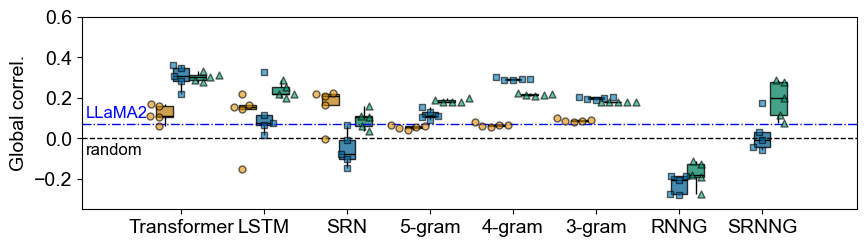

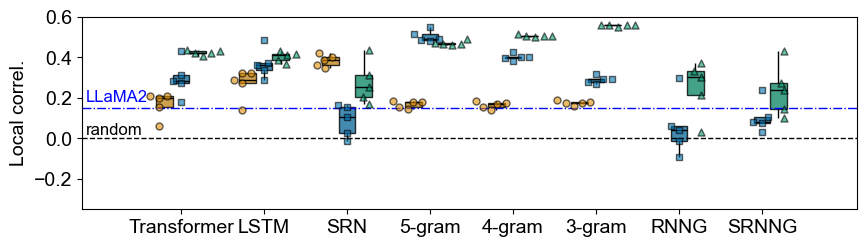

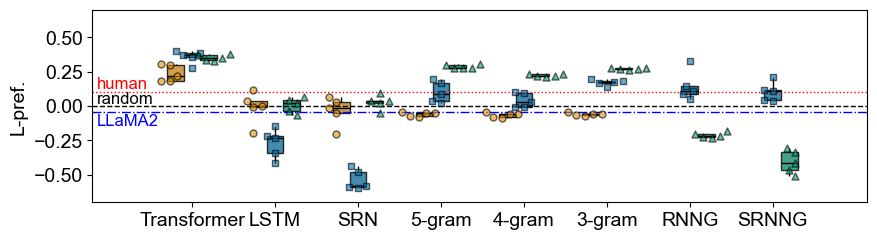

In [12]:
c1, c2, c3 = sns.color_palette("colorblind", 3)
my_pal = {"No": c2, "TD": c1, "LC": c3}
figsize = (10,2.5)

def syntax_violinplot(df, metric, ylabel="", ylim=(-1,1), horizon=None, filename=None):
    plt.figure(figsize=figsize)
    df_sub = df[df["model"].isin(list(model2architecture.keys()))]
    df_sub = df_sub[~df_sub["traversal"].isin(["BU"])]
    ax = sns.swarmplot(df_sub[["architecture", "syntax", "traversal", metric]], x="architecture", y=metric, hue="traversal", hue_order=["No", "TD", "LC"], order=order, dodge=True, legend=False,  edgecolor="black", linewidth=1, alpha=0.6, size=5)

    for i in range(len(order)):
        ax.collections[i*3+1].set_paths([square_mk])
        ax.collections[i*3+2].set_paths([triangle_up_mk])

        ax.collections[i*3].set_facecolor(c2)
        ax.collections[i*3+1].set_facecolor(c1)
        ax.collections[i*3+2].set_facecolor(c3)

    sns.boxplot(df_sub[["architecture", "syntax", "traversal", metric]], x="architecture", y=metric, hue="traversal", hue_order=["No", "TD", "LC"], order=order, dodge=True, legend=False, showcaps=False, showfliers=False, color="w", linecolor="black", palette=my_pal, boxprops=dict(alpha=.8), width=.6) 
    if horizon:
        for label, y, offset_x, offset_y, color, style in horizon:
            plt.axhline(y=y, color=color, linestyle=style, linewidth=1)
            plt.text(offset_x, y+offset_y, label, fontsize=12, color=color)
    plt.xlabel("")
    plt.ylabel(ylabel, fontsize=14)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.ylim(ylim)
    plt.gca().margins(x=0.11)

    
    if filename:
        plt.savefig(filename, bbox_inches="tight")

    plt.show()

syntax_violinplot(df, "correl", "Global correl.", ylim=(-0.35, 0.6), horizon=[("random", 0, -1.15, -0.08, "black", "--"), ("LLaMA2", 0.07, -1.15, 0.03, "blue", "-.")], filename="../figures/correl.pdf")
syntax_violinplot(df, "micro_correl", "Local correl.", ylim=(-0.35, 0.6),horizon=[("random", 0, -1.15, 0.02, "black", "--"), ("LLaMA2", 0.15, -1.15, 0.03, "blue", "-.")], filename="../figures/micro_correl.pdf")
syntax_violinplot(df, "left_pref", "L-pref.", ylim=(-0.7, 0.7), horizon=[("random", 0, -1.15, 0.02, "black", "--"), ("human", 0.105, -1.15, 0.02, "red", ":"), ("LLaMA2", -0.04, -1.15, -0.1, "blue", "-.")], filename="../figures/left_pref.pdf")

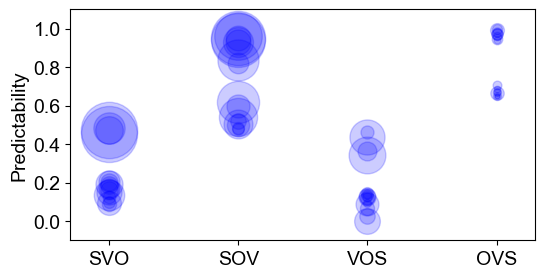

In [6]:
lang2ppl = json.load(open(f"../work/results/lang_ppl_distributions/3gram_actions_lc-as_fold0.json"))
plt.figure(figsize=(6, 3))
max_ppls = max(lang2ppl.values())
min_ppls = min(lang2ppl.values())
lang2ppl = {k: 1-(v-min_ppls)/(max_ppls-min_ppls) for k, v in lang2ppl.items()}
id2xlabel = {"00": "SOV", "01": "SVO", "10": "OVS", "11": "VOS"}
for k, v in lang2gold.items():
    ppl = lang2ppl[k]
    obj_pos = k[:2]
    popularity = lang2gold[k]
    plt.scatter(id2xlabel[obj_pos], ppl, alpha=0.2, s=popularity*20000, color="blue")
plt.ylabel("Predictability", fontsize=14)
plt.xticks(fontsize=14) 
plt.yticks(fontsize=14)
plt.margins(x=0.1, y=0.1)
plt.savefig("../figures/fig3.pdf")
plt.show()

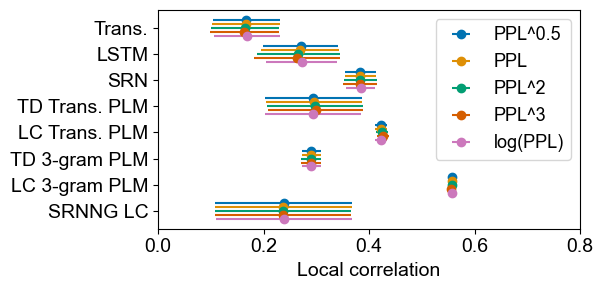

In [7]:
df = pd.read_csv("../work/results/regression/results_20230908.csv")
model2k2correl = df[["model", "k", "micro_correl"]].groupby(["model", "k"]).mean().unstack()["micro_correl"].T.to_dict()
model2k2std = df[["model", "k", "micro_correl"]].groupby(["model", "k"]).std().unstack()["micro_correl"].T.to_dict()

models = ["Transformer", "LSTM", "RNN", "Transformer-action_td", "Transformer-action_lc-as", "3gram_actions_td", "3gram_actions_lc-as", "SRNNG_in_order"][::-1]
ks = ["0.5", "1.0", "2.0", "3.0", "log"]
k2label = {"0.5": "PPL^0.5", "1.0": "PPL", "2.0": "PPL^2", "3.0": "PPL^3", "log": "log(PPL)"}
model2label = {"Transformer": "Trans.", "Transformer-action_td": "TD Trans. PLM", "Transformer-action_lc-as": "LC Trans. PLM", "LSTM": "LSTM", "RNN": "SRN", "3gram_actions_td": "TD 3-gram PLM", "3gram_actions_lc-as": "LC 3-gram PLM", "SRNNG_in_order": "SRNNG LC"}

k2color = {k: c for k, c in zip(ks, sns.color_palette("colorblind", len(ks)))}

# Create a figure and a set of subplots
fig, ax = plt.subplots(figsize=(6, 3))

# Vertical offset for each PPL category to prevent overlapping
offsets = np.linspace(0.3, -0.3, len(ks))

# Error bar plot for each model with different colors for each PPL category
for i, model in enumerate(models):
    for j, (k, offset) in enumerate(zip(ks, offsets)):
        ax.errorbar(model2k2correl[model][k], i + offset, xerr=model2k2std[model][k], fmt='o', label=k2label[k], color=k2color[k])

# Adding the legend outside the plot
handles, labels = ax.get_legend_handles_labels()
unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
ax.legend(*zip(*unique), loc='upper right', fontsize=13)

# Adding labels for y-axis with appropriate offset
ax.set_yticks(np.arange(len(models)) + np.mean(offsets))
ax.set_yticklabels([model2label[m] for m in models], fontsize=14)
ax.tick_params(axis='x', labelsize=14)

# Setting the x-axis label
ax.set_xlabel('Local correlation', fontsize=14)

plt.tight_layout()
plt.xlim(0.0, 0.8)
# plt.legend(fontsize=13)
plt.savefig("../figures/linking_hypothesis.pdf", bbox_inches="tight")

plt.show()

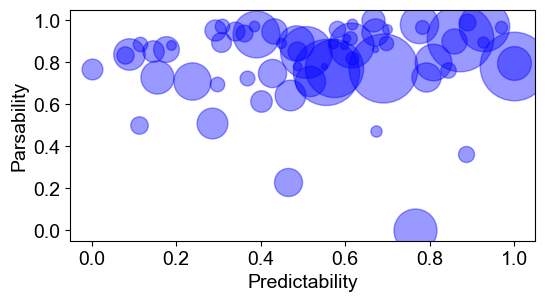

In [8]:
lang2ppl = json.load(open(f"../work/results/lang_ppl_distributions/SRNNG_in_order_beam_fold0.json"))
lang2parse = json.load(open(f"../work/results/lang_parseability_distributions/SRNNG_in_order_beam_fold0.json"))
lang2parse = {k: v["fscore"] for k, v in lang2parse.items()}
max_ppls = max(lang2ppl.values())
min_ppls = min(lang2ppl.values())
lang2ppl = {k: 1-(v-min_ppls)/(max_ppls-min_ppls) for k, v in lang2ppl.items()}
max_parses = max(lang2parse.values())
min_parses = min(lang2parse.values())
lang2parse = {k: (v-min_parses)/(max_parses-min_parses) for k, v in lang2parse.items()}

plt.figure(figsize=(6, 3))
for lang, ppl in lang2ppl.items():
    if lang in lang2parse:
        scatter = plt.scatter(ppl, lang2parse[lang], marker="o", alpha=0.4, color="blue", s=lang2gold[lang]*30000)
plt.xlabel("Predictability", fontsize=14)
plt.ylabel("Parsability", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax = scatter.axes
plt.savefig("../figures/parsability_ppl.pdf", bbox_inches="tight")

plt.show()